In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Task 1 – Exploring and Visualizing the Iris Dataset 🌸

**Objective**

In this notebook I will practice:

- Loading a dataset using `pandas`
- Inspecting the structure of the data
- Getting summary statistics using `.info()` and `.describe()`
- Visualizing the data using:
  - Scatter plots (relationships between features)
  - Histograms (value distributions)
  - Box plots (spread and outliers)

**Dataset:** Iris dataset (classic flower dataset with 3 species)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


## 1. Load the Iris Dataset

I will use the built-in Iris dataset from `seaborn`, so I don't need to upload any CSV file.

Each **row** = one flower  
Each **column** = a measurement (feature) or the species label.



In [3]:
df = sns.load_dataset("iris")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Basic Dataset Inspection

Here I check:

- Shape of the dataset (rows, columns)
- Column names
- First few rows

This helps me understand what kind of data I am working with.



In [4]:
# Shape of the dataset: (rows, columns)
print("Shape of dataset (rows, columns):", df.shape)

# Column names
print("\nColumn Names:", df.columns.tolist())

# Show first 5 rows again for quick inspection
print("\nFirst 5 rows of the dataset:")
df.head()



Shape of dataset (rows, columns): (150, 5)

Column Names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Dataset Info and Summary Statistics

Now I will use:

- `df.info()` – to see:
  - Data types of each column
  - Number of non-null values (check for missing data)
- `df.describe()` – to see:
  - Mean, standard deviation
  - Min / max
  - Quartiles (25%, 50%, 75%)

This gives a quick overview of how the numeric features are distributed.


In [5]:
print("=== Dataset Info ===")
df.info()

print("\n=== Summary Statistics ===")
df.describe()


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

=== Summary Statistics ===


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Visualizing the Iris Dataset

Now I will create visualizations to understand patterns in the data:

1. **Scatter plot** – to see relationships between two features, colored by species  
2. **Histograms** – to see distributions of each numeric feature  
3. **Box plots** – to detect outliers and compare feature spread


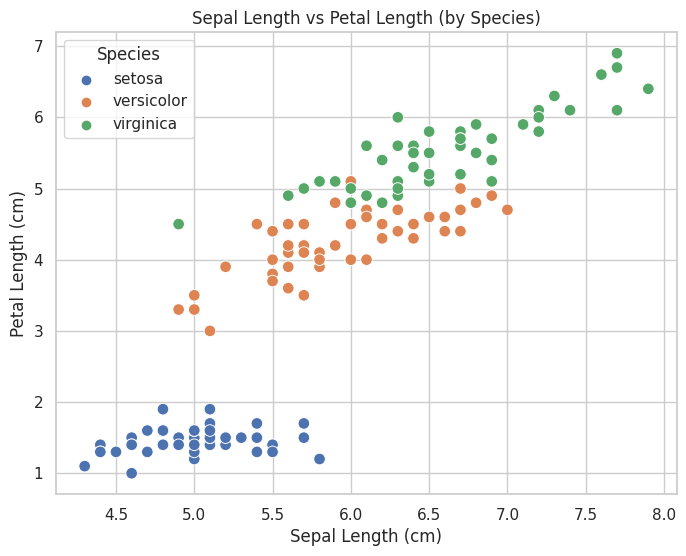

In [6]:
# Scatter plot: Sepal Length vs Petal Length, colored by species

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="sepal_length",
    y="petal_length",
    hue="species",
    s=70
)
plt.title("Sepal Length vs Petal Length (by Species)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()


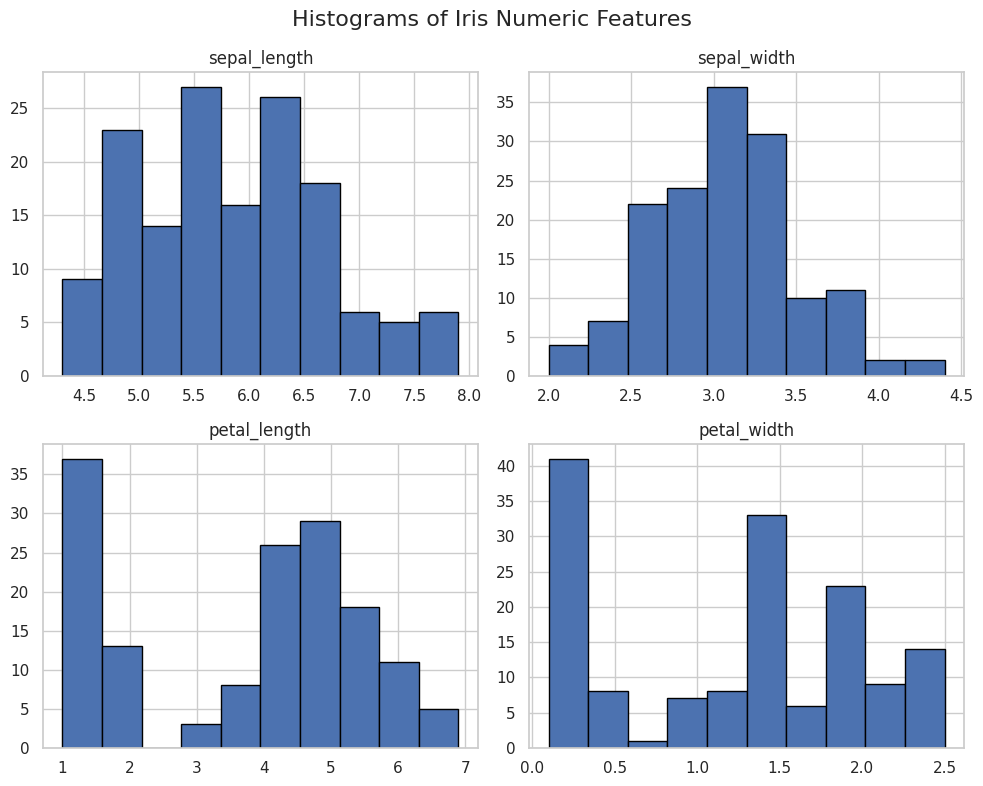

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


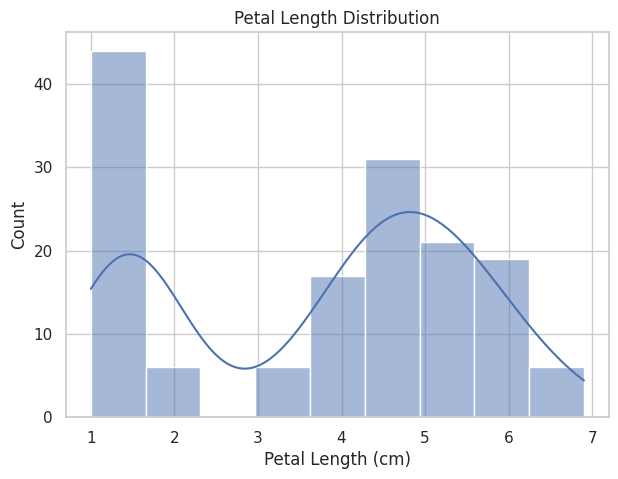

In [7]:
# Histograms for all numeric features

df.hist(figsize=(10, 8), edgecolor="black")
plt.suptitle("Histograms of Iris Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Optional: focus on petal_length with KDE curve

plt.figure(figsize=(7, 5))
sns.histplot(df["petal_length"], kde=True)
plt.title("Petal Length Distribution")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Count")
plt.show()



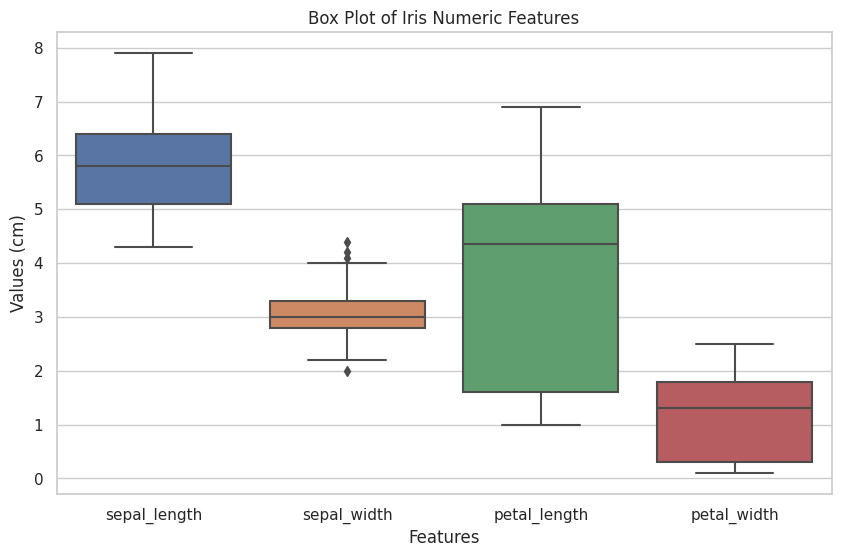

In [8]:
# Box plots for numeric features (drop categorical 'species')

plt.figure(figsize=(10, 6))
df_numeric = df.drop(columns=["species"])

sns.boxplot(data=df_numeric)
plt.title("Box Plot of Iris Numeric Features")
plt.xlabel("Features")
plt.ylabel("Values (cm)")
plt.show()



## 5. Summary – What I Learned

From this notebook, I practiced:

- Loading the Iris dataset using `seaborn`
- Inspecting:
  - Shape (`df.shape`)
  - Columns (`df.columns`)
  - Head (`df.head()`)
- Understanding structure:
  - `df.info()` for data types and missing values
  - `df.describe()` for summary statistics
- Visualizing:
  - Scatter plot: showed how `sepal_length` and `petal_length` differ by species
  - Histograms: showed how each feature is distributed
  - Box plots: showed feature spread and possible outliers
  - (Optional) Pairplot: showed all feature relationships at once

These are core **EDA (Exploratory Data Analysis)** skills used at the start of almost every AI/ML project.

